# 02 Webscraping
**Aufgabe:** Einlesen der Daten zur Wassertemperatur der Aare in Bern. Diese Daten werden vom Bundesamt erhoben und [online publiziert](http://www.hydrodaten.admin.ch/de/tabelle-der-aktuellen-situation-der-abflusse-und-wasserstande.html), allerdings sind keine historischen Daten verfügbar. Weshalb also nicht einen Roboter basteln, der die Werte im Halbstundentakt abholt und abspeichert? 

In [149]:
# Importieren der nötigen Erweiterungen (Bibliotheken).

import requests
from bs4 import BeautifulSoup
from datetime import datetime
import csv

In [171]:
# Einlesen der Daten zum Wasserstand. 

url = 'http://www.hydrodaten.admin.ch/de/tabelle-der-wassertemperaturen.html'

response = requests.get(url)
soup_temperatur = BeautifulSoup(response.text, 'html.parser')

Nun wird die betreffende **Website analysiert**. Dazu verwendet man den **Inspector** des Webbrowsers. Wo befinden sich die gewünschten Informationen? 

In [172]:
# Extrahieren aller Zellen der Tabelle.

tds = soup_temperatur.find_all('td') # Aus dem HTML-Code wird extrahiert, was zwischen <td> und </td>-Tags steht.

In [173]:
station = '2135' # Kennnummer der Messstation am Altenberg in Bern.

In [174]:
for td in tds:
    try:
        if station in td.string:
            zeit = td.nextSibling.nextSibling.nextSibling.nextSibling
            temperatur = td.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling
            #zeit = datetime.strptime(zeit.string.strip(), "%d.%m.%Y %H:%M")
            #temperatur = float(temperatur.string.strip())
            print('Zeit:', zeit)
            print('Temperatur:', temperatur)
            
            # Save the data to files.
            #felder=[zeit,temperatur]
            #dateiname = 'data/aare_temperatur.csv'
            #with open(dateiname, 'a') as f:
            #    writer = csv.writer(f)
            #    writer.writerow(felder)
    except:
        pass

Zeit: <td>
        30.11.2016 23:00
      </td>
Temperatur: <td class="text-right">
        8.2
      </td>


Dieses kleine Script kann nun als so genannter Cronjob regelmässig gestartet und abgearbeitet werden.

# 04 Python & Regex für unstrukturierte Daten
**Aufgabe:** Was aber, wenn die Daten nicht in der gewünschten Form vorliegen? Wie etwa lässt sich bloss der Ort aus der Zelle extrahieren, die den Fluss, den Ort sowie präzisierende Angaben zum Ort enthalten?  
* In diesem Fall muss nach Mustern im Text gesucht werden. Dazu dienen so genannte reguläre Ausdrücke (Regex).  
* Zwei Varianten: 
    * Mit dem Texteditor. 
    * Mit einem Skript. 

**Tool-Tipp:** Oft ist es nicht ganz einfach, den richtigen regulären Ausdruck zu finden. Ein praktisches Tool ist [Regexr.com](http://regexr.com). Dort sieht man sofort, ob der Ausdruck korrekt ist.

In [156]:
import re

In [201]:
## Extrahieren des Orts. 
for td in tds:
    try:
        print(td)
        #ort = re.search(r'( \w*),', td.text)
        #ort = ort.group(1)
        #ort = str.replace(ort,'Ã¼', 'ü')
        #ort = str.replace(ort, 'Ã¶', 'ö')
        #print(ort)
    except:
        pass

<td>
        2135
      </td>
<td>
<a href="/de/2135.html"><strong>Aare</strong> - Bern, SchÃ¶nau</a>
</td>
<td>
        30.11.2016 23:00
      </td>
<td class="text-right">
        8.2
      </td>
<td class="text-right">
        8.8
      </td>
<td>
        Â°C
      </td>
<td>
<p><a href="/lhg/az/plots/surface/7day/2135_7.PDF" target="_blank"><span class="glyphicon glyphicon-stats glyphicon-spaced-r"></span>7 Tage</a></p>
</td>
<td>
        2019
      </td>
<td>
<a href="/de/2019.html"><strong>Aare</strong> - Brienzwiler</a>
</td>
<td>
        30.11.2016 23:00
      </td>
<td class="text-right">
        3.9
      </td>
<td class="text-right">
        4.6
      </td>
<td>
        Â°C
      </td>
<td>
<p><a href="/lhg/az/plots/surface/7day/2019_7.PDF" target="_blank"><span class="glyphicon glyphicon-stats glyphicon-spaced-r"></span>7 Tage</a></p>
</td>
<td>
        2016
      </td>
<td>
<a href="/de/2016.html"><strong>Aare</strong> - Brugg</a>
</td>
<td>
        30.11.2016 23:10
      

## 07 Statische Visualisierungen
**Aufgabe:** Aus den Daten zur Wassertemperatur der Aare soll eine Grafik produziert werden. 

In [218]:
# Importieren der nötigen Erweiterungen (Bibliotheken).

import pandas as pd
import datetime as datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import dateutil.parser
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
import matplotlib.dates as dates

In [219]:
# Einlesen der Daten.

df_temperatur = pd.read_csv('data/wassertemperatur_aare.csv')
df_temperatur.columns = ['Zeit', 'Temperatur']
df_temperatur.index = df_temperatur['Zeit']
del df_temperatur['Zeit']
df_temperatur.head()

,Temperatur
Zeit,
2016-07-26 21:20:00,18.9
2016-07-26 21:50:00,18.8
2016-07-26 22:20:00,18.7
2016-07-26 22:50:00,18.7
2016-07-26 23:20:00,18.8


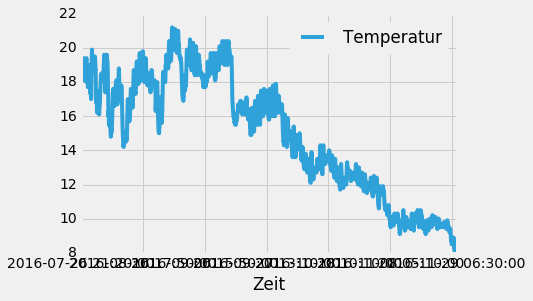

In [235]:
df_temperatur.plot()

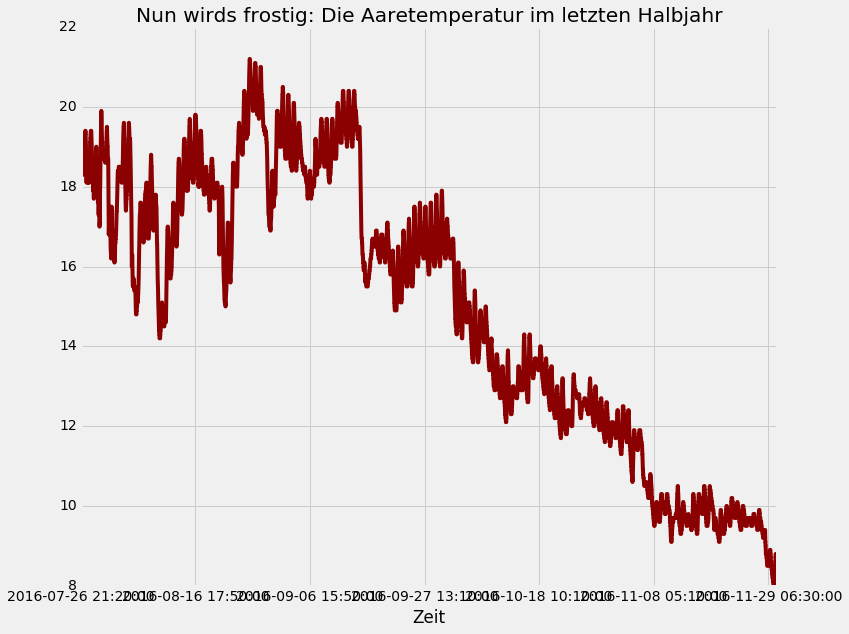

In [234]:
fig, ax = plt.subplots()
df_temperatur.plot(figsize=[12,9], 
                   color='darkred', 
                   title='Nun wirds frostig: Die Aaretemperatur im letzten Halbjahr',
                   legend=False,
                   ax=ax)
plt.tight_layout()
plt.show()
plt.savefig('data/aaretemperatur.svg')